In [1]:
import pandas as pd                                                 #Library to deal with data frame
import numpy as np                                                  #Library to deal with arrays
import matplotlib.pyplot as plt                                     #Library to deal with graphs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error                      #Library to calculate mean square error
from math import sqrt                                               #Math library to calculate square
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})     #constant customization for all the graphs
pd.options.mode.chained_assignment = None 

In [2]:
#Reading a dataset 
df = pd.read_csv('Datasets2_Cleanned.csv', names=['value'], header=0)

In [3]:
#check for its dimensions
df.shape

(2814, 1)

In [4]:
np.asarray(df)

array([[58. ],
       [62.6],
       [70. ],
       ...,
       [55.8],
       [33.3],
       [33.4]])

In [5]:
#check for its columns and rows
df.head()

,value
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


In [6]:
#SES_MODEl
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(df)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(2000,2700)

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [7]:
yhat

1915-11-01    55.356835
1915-12-01    48.516739
1916-01-01    41.059551
1916-02-01    43.315555
1916-03-01    49.744724
                ...    
1974-03-01    26.515974
1974-04-01    23.740971
1974-05-01    32.550708
1974-06-01    36.247872
1974-07-01    36.115999
Length: 701, dtype: float64

In [8]:
#check for dimensions of the predicted 
yhat.shape

(701,)

In [9]:
df[2000:2700].shape

(700, 1)

In [10]:
#calculating mean square error
mae=mean_squared_error(yhat,df[2000:2701].value)
print(sqrt(mae))

17.21472624307182


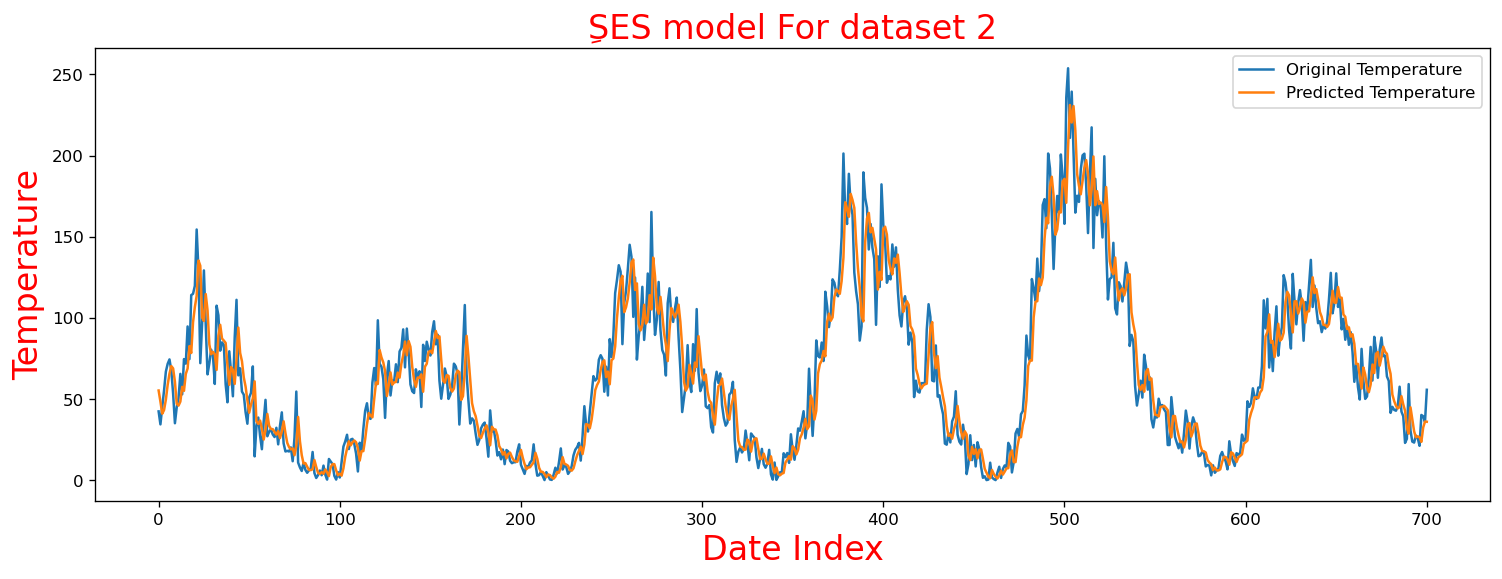

In [13]:
#plotting the graph
plt.figure(figsize=(15,5))

plt.plot(df[2000:2701].values,label='Original Temperature')
plt.plot(yhat.values,label='Predicted Temperature')
plt.xlabel("Date Index" ,fontsize=20,color='red')
plt.ylabel("Temperature",fontsize=20,color='red')
plt.title("ِSES model For dataset 2",fontsize=20,color='red')
plt.legend()